# Decesion Tree Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Decision Tree implementation

In [2]:
class DecisionTreeClassifier:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        self.tree = self.create_tree(X, y, depth=0)

    def create_tree(self, X, y, depth):
        num_samples, num_features = X.shape
        num_classes = len(np.unique(y))

        if depth == self.max_depth or num_samples < self.min_samples_split or num_classes == 1:
            return {'class': np.argmax(np.bincount(y)), 'num_samples': num_samples}

        best_gini = float('inf')
        best_split = None

        for feature_index in range(num_features):
            values = np.unique(X[:, feature_index])
            for value in values:
                left_mask = X[:, feature_index] <= value
                right_mask = ~left_mask

                left_gini = self._calculate_gini(y[left_mask])
                right_gini = self._calculate_gini(y[right_mask])

                weighted_gini = (len(y[left_mask]) / num_samples) * left_gini + \
                                (len(y[right_mask]) / num_samples) * right_gini

                if weighted_gini < best_gini:
                    best_gini = weighted_gini
                    best_split = (feature_index, value)

        if best_gini == float('inf'):
            return {'class': np.argmax(np.bincount(y)), 'num_samples': num_samples}

        left_mask = X[:, best_split[0]] <= best_split[1]
        right_mask = ~left_mask

        left_subtree = self.create_tree(X[left_mask, :], y[left_mask], depth + 1)
        right_subtree = self.create_tree(X[right_mask, :], y[right_mask], depth + 1)

        return {'feature_index': best_split[0],
                'split_value': best_split[1],
                'left': left_subtree,
                'right': right_subtree,
                'num_samples': num_samples}

    def _calculate_gini(self, y):
        if len(y) == 0:
            return 0
        p = np.bincount(y) / len(y)
        return 1 - np.sum(p ** 2)

    def predict(self, X):
        return np.array([self._predict_tree(x, self.tree) for x in X])

    def _predict_tree(self, x, node):
        if 'class' in node:
            return node['class']
        if x[node['feature_index']] <= node['split_value']:
            return self._predict_tree(x, node['left'])
        else:
            return self._predict_tree(x, node['right'])

# Data Loading

In [3]:
# Load the dataset
data = pd.read_csv("Q1Data.csv")
data=data.dropna(how='any')

# Select features (MFCCs_1 to MFCCs_6) and target variable (Genus)
X = data.iloc[:, :6].values  # Assuming MFCCs_1 to MFCCs_6 are in columns 0 to 5
y=data['Genus'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_numeric = pd.factorize(y_train)[0]

Accuracy: 69.91%
Accuracy: 78.25%
Accuracy: 83.32%
Accuracy: 84.92%
Accuracy: 87.07%
Accuracy: 88.67%
Accuracy: 90.06%
Accuracy: 91.66%
Accuracy: 91.80%
Accuracy: 92.56%
Accuracy: 92.08%
Accuracy: 92.70%
Accuracy: 92.56%
Accuracy: 92.84%
Accuracy: 92.56%
Accuracy: 92.56%


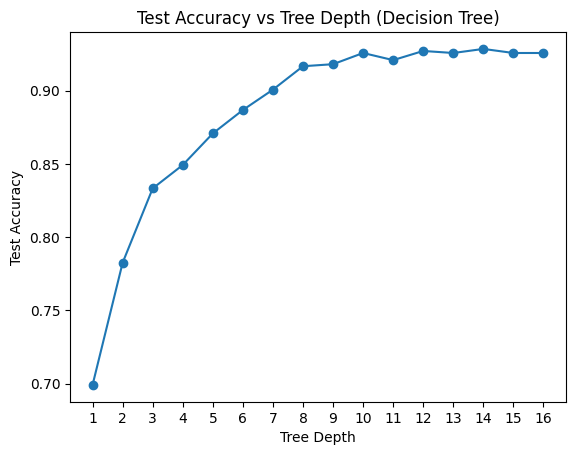

In [15]:
depths=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
accurate_array=[]
final_array_1=[]

final_depth_1=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

for depth in depths:




  clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=4)


  clf.fit(X_train, y_train_numeric)


  y_pred = clf.predict(X_test)


  y_pred_original_labels = pd.Series(y_pred).map({i: label for i, label in enumerate(pd.unique(y_train))})



  accuracy = accuracy_score(y_test, y_pred_original_labels)
  accurate_array.append(accuracy)
  final_array_1.append(accuracy)  
  print(f"Accuracy: {accuracy * 100:.2f}%")


plt.plot(depths, accurate_array, marker='o')
plt.title('Test Accuracy vs Tree Depth (Decision Tree)')
plt.xlabel('Tree Depth')
plt.ylabel('Test Accuracy')
plt.xticks(depths)
plt.show()

# Observation
The graph shows that the Decision Tree model's accuracy increases with the depth of the tree, peaking at around depth 10 and plateauing thereafter. This behavior aligns with standard Decision Tree patterns. The model achieves high accuracy.

# KNN 

In [24]:
def euclidean_distance(n, m):
    return np.sqrt(np.sum((n - m) ** 2))

class KNN:
    def __init__(self, k=4):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self.find_distances_predict(x) for x in X_test]
        return np.array(predictions)

    def find_distances_predict(self, x):
        distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
        k_neighbours_indices = np.argsort(distances)[:self.k]
        k_neighbours_labels = [self.y_train[i] for i in k_neighbours_indices]

        #bincount used to increase performance
        most_common = np.bincount(k_neighbours_labels).argmax()
       # most_common = self.most_frequent_label(k_neighbours_labels)
        return most_common

    def most_frequent_label(self, labels):
        unique_labels, counts = np.unique(labels, return_counts=True)
        max_count_index = np.argmax(counts)
        most_common_label = unique_labels[max_count_index]
        return most_common_label

In [25]:
df = data.dropna(how="any")

X = data.iloc[:, :7].values
y = data['Genus'].values

y_numeric = pd.factorize(y)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2, random_state=42)
y_numeric = pd.factorize(y_train)[0]

model = KNN(4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 96.04%


Accuracy: 96.66%
Accuracy: 95.69%
Accuracy: 96.53%
Accuracy: 96.04%
Accuracy: 95.83%
Accuracy: 95.76%
Accuracy: 95.62%
Accuracy: 95.62%
Accuracy: 95.48%
Accuracy: 95.27%
Accuracy: 95.07%
Accuracy: 94.72%
Accuracy: 95.07%
Accuracy: 94.72%
Accuracy: 94.72%
Accuracy: 94.51%
Accuracy: 94.44%
Accuracy: 94.37%
Accuracy: 94.30%
Accuracy: 94.16%
Accuracy: 94.16%
Accuracy: 93.75%
Accuracy: 93.82%
Accuracy: 93.75%
Accuracy: 93.68%
Accuracy: 93.40%
Accuracy: 93.33%
Accuracy: 93.33%
Accuracy: 93.26%
Accuracy: 93.19%
Accuracy: 93.12%
Accuracy: 93.12%
Accuracy: 92.98%
Accuracy: 92.98%
Accuracy: 92.98%
Accuracy: 92.84%
Accuracy: 92.63%
Accuracy: 92.56%
Accuracy: 92.56%
Accuracy: 92.56%
Accuracy: 92.49%
Accuracy: 92.56%
Accuracy: 92.49%
Accuracy: 92.49%
Accuracy: 92.49%
Accuracy: 92.36%
Accuracy: 92.15%
Accuracy: 92.29%
Accuracy: 92.22%


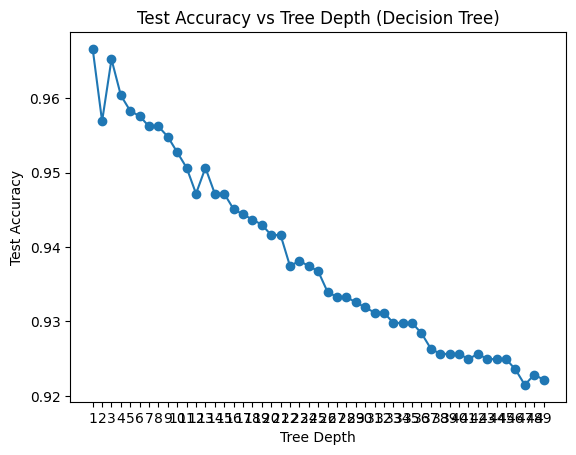

In [26]:

neighbours=[]
a1=[]
accurate_array=[]
b1=[]
for i in range(1,50):
    neighbours.append(i)
    a1.append(i)

for neighbour in neighbours:
    
    model=KNN(k=neighbour)
    model.fit(X_train,y_train)
    pre=model.predict(X_test)
    accuracy = np.sum(pre == y_test) / len(y_test)
    accurate_array.append(accuracy)
    b1.append(accuracy)
    print(f'Accuracy: {accuracy * 100:.2f}%')



plt.plot(neighbours, accurate_array, marker='o')
plt.title('Test Accuracy vs Tree Depth (Decision Tree)')
plt.xlabel('Tree Depth')
plt.ylabel('Test Accuracy')
plt.xticks(neighbours)
plt.show()



# Observations
The KNN model achieves its highest accuracy (96.66%) with a small number of neighbors (k=1). As the number of neighbors increases, accuracy gradually decreases, indicating the impact of nearest neighbors on predictive performance. The model's stability is notable within a specific range of neighbor values.

# Using inbuilt algorithms


# KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# DECISION TREE

Accuracy: 95.83%
Accuracy: 96.66%
Accuracy: 95.69%
Accuracy: 96.53%
Accuracy: 96.04%
Accuracy: 95.83%
Accuracy: 95.76%
Accuracy: 95.62%
Accuracy: 95.62%
Accuracy: 95.48%
Accuracy: 95.27%
Accuracy: 95.07%
Accuracy: 94.72%
Accuracy: 95.07%
Accuracy: 94.72%
Accuracy: 94.72%
Accuracy: 94.51%
Accuracy: 94.44%
Accuracy: 94.37%
Accuracy: 94.30%
Accuracy: 94.16%
Accuracy: 94.16%
Accuracy: 93.75%
Accuracy: 93.82%
Accuracy: 93.75%
Accuracy: 93.68%
Accuracy: 93.40%
Accuracy: 93.33%
Accuracy: 93.33%
Accuracy: 93.26%
Accuracy: 93.19%
Accuracy: 93.12%
Accuracy: 93.12%
Accuracy: 92.98%
Accuracy: 92.98%
Accuracy: 92.98%
Accuracy: 92.84%
Accuracy: 92.63%
Accuracy: 92.56%
Accuracy: 92.56%
Accuracy: 92.56%
Accuracy: 92.49%
Accuracy: 92.56%
Accuracy: 92.49%
Accuracy: 92.49%
Accuracy: 92.49%
Accuracy: 92.36%
Accuracy: 92.15%
Accuracy: 92.29%
Accuracy: 92.22%
Accuracy: 92.36%
Accuracy: 92.22%
Accuracy: 92.22%
Accuracy: 92.29%
Accuracy: 92.36%
Accuracy: 92.01%
Accuracy: 92.01%
Accuracy: 92.01%
Accuracy: 92.0

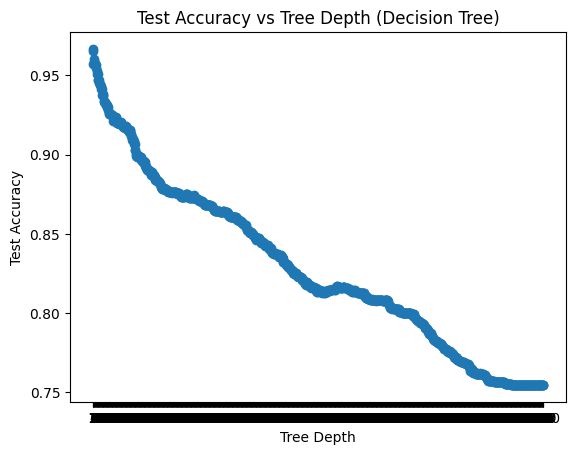

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pre=knn.predict(X_test)
accuracy = np.sum(pre == y_test) / len(y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')
depths=[]
a2=[]
accurate_array=[]
b2=[]
for i in range(1,1001):
    depths.append(i)
    a2.append(i)

for depth in depths:
    
    model=KNeighborsClassifier(n_neighbors=depth)
    model.fit(X_train,y_train)
    pre=model.predict(X_test)
    accuracy = np.sum(pre == y_test) / len(y_test)
    accurate_array.append(accuracy)
    b2.append(accuracy)
    print(f'Accuracy: {accuracy * 100:.2f}%')



plt.plot(depths, accurate_array, marker='o')
plt.title('Test Accuracy vs Tree Depth (Decision Tree)')
plt.xlabel('Tree Depth')
plt.ylabel('Test Accuracy')
plt.xticks(depths)
plt.show()

# DECISION TREE

In [11]:
from sklearn.tree import DecisionTreeClassifier

Accuracy for depth 1: 69.91%
Accuracy for depth 2: 78.25%
Accuracy for depth 3: 83.32%
Accuracy for depth 4: 84.92%
Accuracy for depth 5: 87.07%
Accuracy for depth 6: 88.74%
Accuracy for depth 7: 90.06%
Accuracy for depth 8: 91.80%
Accuracy for depth 9: 92.15%
Accuracy for depth 10: 92.63%
Accuracy for depth 11: 92.56%
Accuracy for depth 12: 92.49%
Accuracy for depth 13: 92.63%
Accuracy for depth 14: 92.49%
Accuracy for depth 15: 92.56%
Accuracy for depth 16: 92.15%


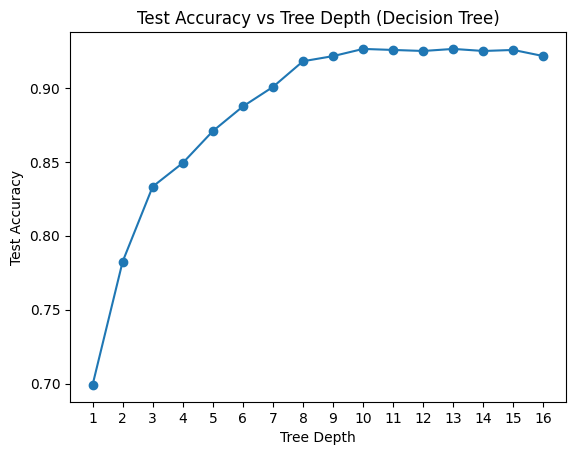

In [18]:
X=df.iloc[:,:6].values
y=df['Genus'].values


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
y_train_numeric = pd.factorize(y_train)[0]
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

depths=[]
final_array_2=[]

final_depth_2=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

for i in range(1,17):
    depths.append(i)
depths = list(range(1, 17))
accurate_array=[]
for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accurate_array.append(accuracy)
    final_array_2.append(accuracy)
    print(f'Accuracy for depth {depth}: {accuracy*100:.2f}%')

plt.plot(depths, accurate_array, marker='o')
plt.title('Test Accuracy vs Tree Depth (Decision Tree)')
plt.xlabel('Tree Depth')
plt.ylabel('Test Accuracy')
plt.xticks(depths)
plt.show()


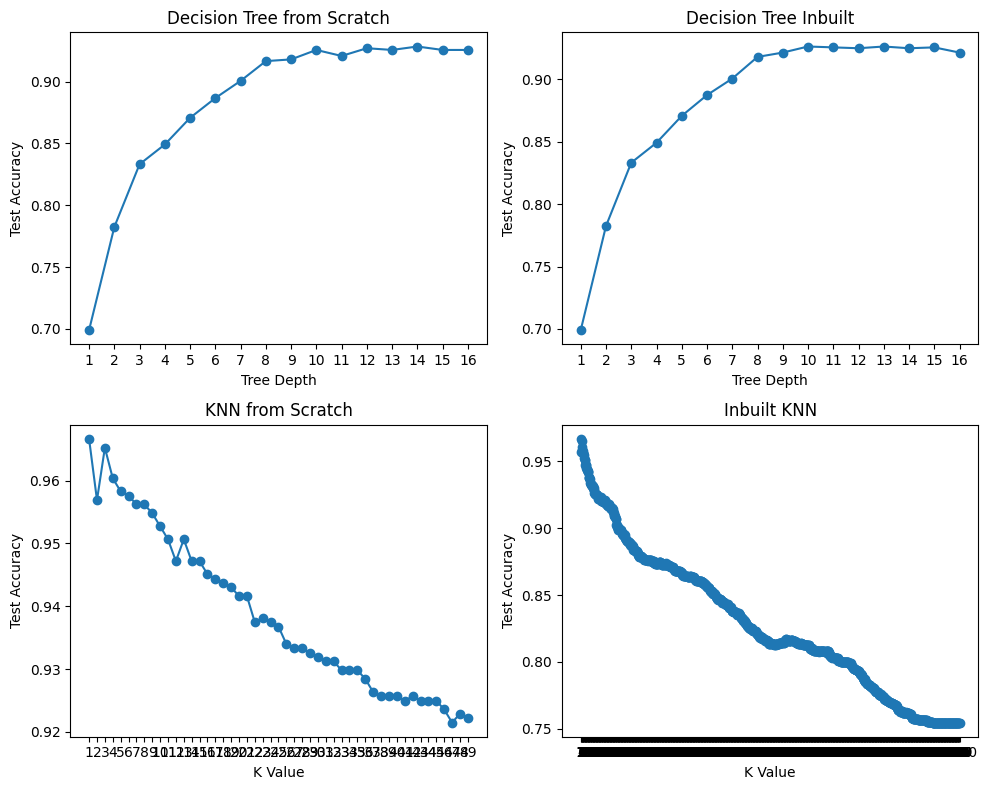

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot Decision Tree from Scratch
axes[0, 0].plot(final_depth_1, final_array_1, marker='o')
axes[0, 0].set_title('Decision Tree from Scratch')
axes[0, 0].set_xlabel('Tree Depth')
axes[0, 0].set_ylabel('Test Accuracy')
axes[0, 0].set_xticks(final_depth_1)

# Plot Decision Tree Inbuilt
axes[0, 1].plot(final_depth_2, final_array_2, marker='o')
axes[0, 1].set_title('Decision Tree Inbuilt')
axes[0, 1].set_xlabel('Tree Depth')
axes[0, 1].set_ylabel('Test Accuracy')
axes[0, 1].set_xticks(final_depth_2)

# Plot KNN from Scratch
axes[1, 0].plot(a1, b1, marker='o')
axes[1, 0].set_title('KNN from Scratch')
axes[1, 0].set_xlabel('K Value')
axes[1, 0].set_ylabel('Test Accuracy')
axes[1, 0].set_xticks(a1)

# Plot Inbuilt KNN
axes[1, 1].plot(a2, b2, marker='o')
axes[1, 1].set_title('Inbuilt KNN')
axes[1, 1].set_xlabel('K Value')
axes[1, 1].set_ylabel('Test Accuracy')
axes[1, 1].set_xticks(a2)


plt.tight_layout()

# Show the plots
plt.show()

# Observations 
Decision Tree:

From Scratch: The accuracy increases with tree depth, peaking around depth 10, showcasing typical behavior.
Inbuilt: Similar trends are observed, indicating consistency between the custom and inbuilt Decision Tree implementations.
KNN:

From Scratch: Achieves highest accuracy (96.66%) with k=1, consistent with KNN behavior.
Inbuilt: The accuracy trend aligns with the scratch-built model, demonstrating reliability in the custom implementation.